In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# df = pd.read_csv(r'C:\Users\Nino\Desktop\Spotify\top50.csv', encoding='latin')
df = pd.read_csv(r'C:\Users\hhamadeh\Documents\Datasets\Spotify\top50.csv', encoding='latin')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)


Can we predict the popularity of a song based on some of these metrics?

    Energy: The energy of a song - the higher the value, the more energtic. song
    Danceability: The higher the value, the easier it is to dance to this song.
    Loudness (dB): The higher the value, the louder the song.
    Liveness: The higher the value, the more likely the song is a live recording.
    Valence: The higher the value, the more positive mood for the song.
    Length: The duration of the song.
    Acousticness: The higher the value the more acoustic the song is.
    Speechiness: The higher the value the more spoken word the song contains.
    Popularity: The higher the value the more popular the song is.

In [4]:
df.columns = ['Track', 'Artist', 'Genre', 'BPM', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
        'Length', 'Acousticness', 'Speechiness', 'Popularity']

In [5]:
# Check if there are any nulls
df.isnull().any()

Track            False
Artist           False
Genre            False
BPM              False
Energy           False
Danceability     False
Loudness (dB)    False
Liveness         False
Valence          False
Length           False
Acousticness     False
Speechiness      False
Popularity       False
dtype: bool

In [6]:
# Number of unique artists in top 50
df['Artist'].nunique()

38

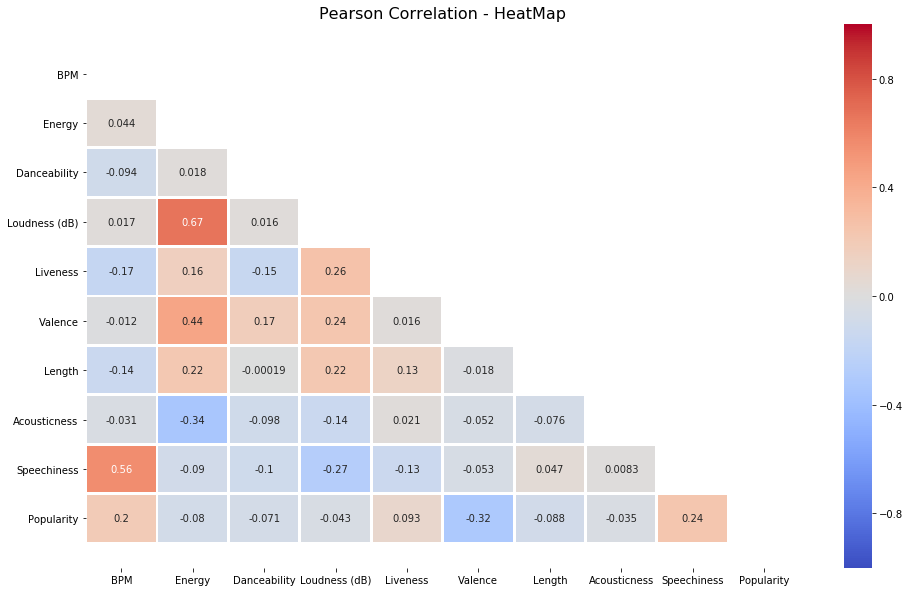

In [7]:
#### Pearson Correlation of Features
dfCorr = df[['BPM', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
        'Length', 'Acousticness', 'Speechiness', 'Popularity']].corr(method='pearson')


# Since a heatmap is mirrored along the diagnol, we can filter out the top half to make it nicer on the eyes
mask = np.zeros_like(dfCorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(16, 10))
ax = sns.heatmap(dfCorr,
           cmap='coolwarm',         # Hotter = Positive, Colder = Negative
           annot=True,
                 vmin=-1,           # set the minimum value of the color scale to -1
                linewidths=2,
                linecolor='white',
                mask=mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Pearson Correlation - HeatMap", size=16)
ax.tick_params(axis='both', which='major', rotation=0, labelsize=10)

Strong correlation between Energy and Loudness (dB).

Popularity and Speechiness/BPM have an interesting result in this heatmap as well.

Things to consider:

1. Energy vs Loudness
2. Beats Per Minute vs Speechiness
3. Genre vs Popularity


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


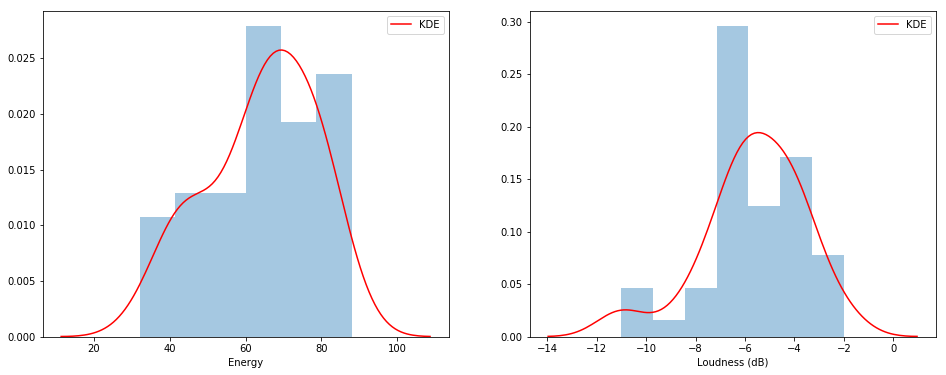

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.distplot(df['Energy'], kde=True, rug=False, kde_kws={'color' : 'r', 'label' : 'KDE'},
             ax=ax[0])
sns.distplot(df['Loudness (dB)'], kde=True, rug=False, kde_kws={'color' : 'r', 'label' : 'KDE'},
             ax=ax[1])

In [ ]:
# # Let's see if we can make a nicer gaussian
# skew = df[['Energy', 'Loudness (dB)']].skew()
# print(skew)

# # Box Cox Transformations (to reduce skew)
# energyXF = np.asarray(df['Energy'])
# loudnessXF = np.asarray(abs(df['Loudness (dB)']))

# e1 = stats.boxcox(energyXF)[0]
# l1 = stats.boxcox(loudnessXF)[0]

# transformed = pd.DataFrame({'Energy' : e1, 'Loudness (dB)' : l1})
# transformed['Loudness (dB)'] = transformed['Loudness (dB)'].apply(lambda x: -abs(x))

# print(transformed.skew())

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# sns.distplot(transformed['Energy'], kde=True, rug=False, kde_kws={'color' : 'r', 'label' : 'KDE'},
#              ax=ax[0])
# sns.distplot(transformed['Loudness (dB)'], kde=True, rug=False, kde_kws={'color' : 'r', 'label' : 'KDE'},
#              ax=ax[1])

In [9]:
# Split data into 80/20 train/test split

from sklearn.model_selection import train_test_split, cross_val_score

X = df[['Energy', 'Loudness (dB)']]
# X = df[['Energy', 'Danceability']]
y = df['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [10]:
# Linear Regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(reg.intercept_)
print(reg.coef_)

92.93090666788962
[-0.07398457  0.15286374]


In [11]:
y_pred = reg.predict(X_test)

df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
34      89  85.655946
2       85  86.400686
24      89  87.920100
12      88  88.980357
36      91  86.987668
15      82  88.531555
47      88  86.627535
41      90  86.982774
3       86  86.899000
1       92  86.326702


In [ ]:
reg.predict([[55, -6]])

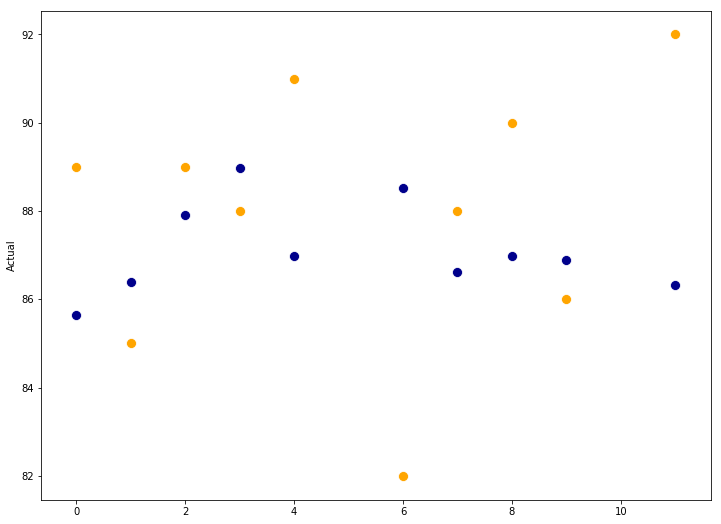

In [12]:
space = np.linspace(0, 11, 10, dtype=int)


plt.figure(figsize=(12, 9))
sns.scatterplot(x=space, y=df_output['Predicted'], color='darkblue', s=100)
sns.scatterplot(x=space, y=df_output['Actual'], color='orange', s=100)

For such a small dataset, this is a fair result.

In [13]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.8310874014687215
Mean Squared Error: 11.801375074049323
Root Mean Squared Error: 3.4353129513989438


In [14]:
# Cross Validation Score
# Linear Regression

reg = LinearRegression()
mse = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# The sum of squared errors (MSE) for each of 5 CVs
print(mse)

mse_mean = np.mean(mse)
print("\nAverage of Mean Squared Error: {}\n".format(mse_mean))

diff = metrics.mean_squared_error(y_test, y_pred) - abs(mse_mean)
print("Difference between inital and CV score: {}".format(diff))


[-14.18881559 -28.49742909 -10.10643451 -10.45239914 -65.99512202]

Average of Mean Squared Error: -25.848040068473335

Difference between inital and CV score: -14.046664994424011


#### Predicting Song Genre

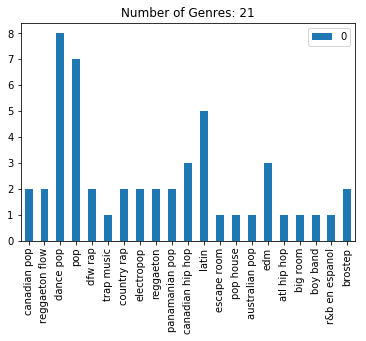

In [15]:
from collections import Counter

genres = Counter(df['Genre'])
g = pd.DataFrame.from_dict(genres, orient='index')
g.plot(kind='bar', title='Number of Genres: {}'.format(df['Genre'].nunique()))

In [16]:
list(df['Genre'].unique())

['canadian pop',
 'reggaeton flow',
 'dance pop',
 'pop',
 'dfw rap',
 'trap music',
 'country rap',
 'electropop',
 'reggaeton',
 'panamanian pop',
 'canadian hip hop',
 'latin',
 'escape room',
 'pop house',
 'australian pop',
 'edm',
 'atl hip hop',
 'big room',
 'boy band',
 'r&b en espanol',
 'brostep']

In [17]:
# Determine number of pop and hiphop/rap songs 

p = df['Genre'].str.contains(pat='pop')
r = df['Genre'].str.contains(pat='hip hop|rap')
reg = df['Genre'].str.contains(pat='reggaeton')
edm = df['Genre'].str.contains(pat='edm|big room')

print('Pop: {}({:.1%})\nRap: {}({:.1%})\nReggae: {}({:.1%})\nEDM: {}({:.1%})'.format(len(p.loc[p]), 
                                                                                     len(p.loc[p])/df['Genre'].shape[0], 
                                                                    len(r.loc[r]), 
                                                                                     len(r.loc[r])/df['Genre'].shape[0],
                                                                   len(reg.loc[reg]), 
                                                                                     len(reg.loc[reg])/df['Genre'].shape[0],
                                                                   len(edm.loc[edm]), 
                                                                                     len(edm.loc[edm])/df['Genre'].shape[0]))

Pop: 23(46.0%)
Rap: 9(18.0%)
Reggae: 4(8.0%)
EDM: 4(8.0%)


In [18]:
# Rename songs to simplify categories
import warnings
warnings.filterwarnings('ignore')

df['Genre'][p] = 'pop'
df['Genre'][r] = 'rap'
df['Genre'][reg] = 'reggaeton'
df['Genre'][edm] = 'edm'

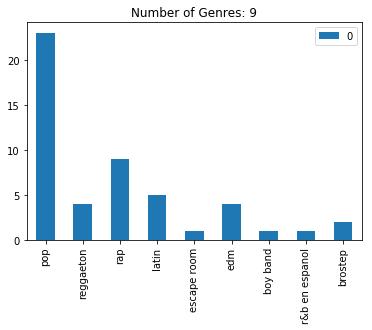

In [19]:
from collections import Counter

genres = Counter(df['Genre'])
g = pd.DataFrame.from_dict(genres, orient='index')
g.plot(kind='bar', title='Number of Genres: {}'.format(df['Genre'].nunique()))

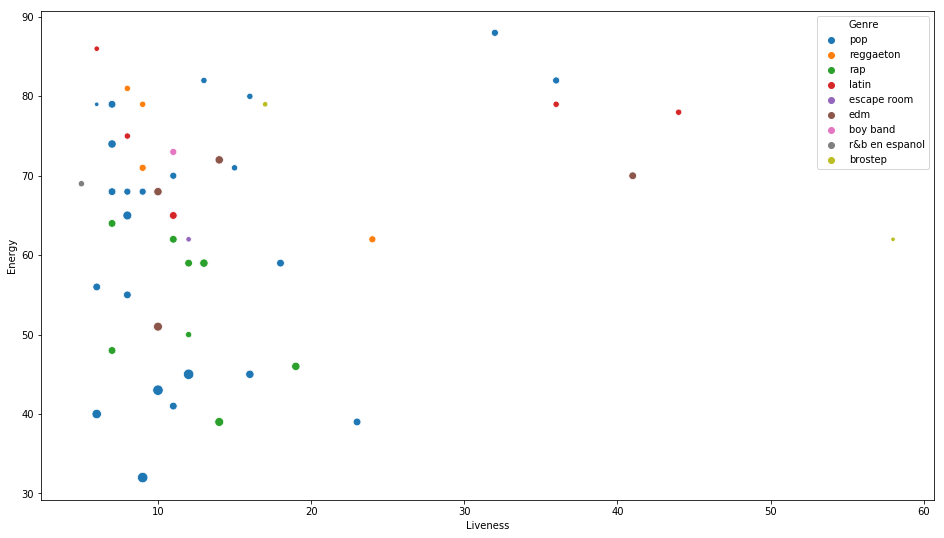

In [20]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df['Liveness'], y=df['Energy'], s=abs(df['Loudness (dB)']) * 10, hue=df['Genre'])

In [21]:
# Label Encode Genres
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encodedGenres = le.fit_transform(df['Genre'])

In [22]:
df['encodedGenre'] = encodedGenres

In [23]:
Xclass = df[['Liveness', 'Energy', 'Loudness (dB)']]
yclass = df['encodedGenre']


from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(Xclass, yclass, test_size=0.2, random_state=42)

In [24]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [25]:
predictGNB = clf.predict(X_test)

GNBoutput = pd.DataFrame({'Predicted' : predictGNB, 'Actual' : y_test})

GNBoutput

,Predicted,Actual
13,5,5
39,5,5
30,7,2
45,4,1
17,7,7
48,4,2
26,5,5
25,8,5
32,5,8
19,5,3


K-Nearest Neighbors Classification

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Xclass, yclass, test_size=0.2, random_state=42)


# Let's scale the data this time (for classification)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)


neigh_output = pd.DataFrame({'Predicted' : y_pred, 'Actual' : y_test})


from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.2

Text(91.68,0.5,'Predicted Label')

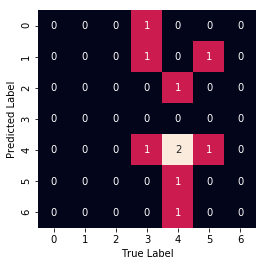

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [28]:
neigh_output

,Predicted,Actual
13,4,5
39,5,5
30,7,2
45,4,1
17,5,7
48,4,2
26,7,5
25,5,5
32,5,8
19,5,3
